# **Práctica 2: ACP y ACD en fuente de datos propia (Etapa de Análisis Exploratorio de Datos)**

Nombres: Ugalde Velasco Armando, Santiago Gutiérrez Diego

No. Cuenta: 317005435, 317126325

Email: armauv@gmail.com, diego.santiago.gutierrez.uwu@gmail.com

### **Contexto**

En un juego de PUBG, hasta 100 jugadores comienzan en cada partida (matchId). Los jugadores pueden estar en equipos (groupId) que se clasifican al final del juego (winPlacePerc) en función de cuántos otros equipos siguen vivos cuando son eliminados. En el juego, los jugadores pueden recoger diferentes municiones, revivir a compañeros de equipo caídos pero no fuera de combate (noqueados), conducir vehículos, nadar, correr, disparar y experimentar todas las consecuencias, como caer demasiado o atropellar y encima. eliminándose a sí mismos.

Se tiene una gran cantidad de estadísticas anónimas del juego PUBG, formateadas para que cada fila contenga las estadísticas posteriores al juego de un jugador. Los datos provienen de partidos de todo tipo: solos, dúos, escuadrones y personalizados; no hay garantía de que haya 100 jugadores por partido, ni como máximo 4 jugadores por grupo.

**Objetivo:** Encontrar información relevante sobre los lugares finales de cada jugador en partidas de PUBG, basados en sus estadísticas.


Realizar una selección de características a través de Análisis de Componentes Principales (ACP) y Análisis Correlacional de Datos (ACD).

**Fuente de datos**

* 1) DBNOs - Número de jugadores enemigos noqueados.
* 2) assists - Número de jugadores enemigos dañados por este jugador que fueron * eliminados por sus compañeros de equipo.
* 3) boosts - Número de objetos de refuerzo utilizados.
* 4) damageDealt - Daño total infligido. Nota: se resta el daño autoinfligido.
* 5) headshotKills - Número de jugadores enemigos eliminados con disparos a la cabeza.
* 6) heals - Número de objetos de curación utilizados.
* 7) Id - ID del jugador.
* 8) killPlace - Posición en la que quedó el jugador en función del número de jugadores enemigos eliminados.
* 9) killPoints - Clasificación externa basada en las eliminaciones del jugador. (Piensa en esto como una clasificación Elo donde solo las eliminaciones importan). Si hay un valor distinto de -1 en rankPoints, entonces cualquier 0 en killPoints debe tratarse como "Ninguno".
* 10) killStreaks - Máximo número de jugadores enemigos eliminados en un corto período de tiempo.
* 11) kills - Número de jugadores enemigos eliminados.
* 12) longestKill - La distancia más larga entre el jugador y el jugador eliminado en el momento de la muerte. Esto puede ser engañoso, ya que derribar a un jugador y alejarse en un vehículo puede dar lugar a una estadística de longestKill muy alta.
* 13) matchDuration - Duración del partido en segundos.
* 14) matchId - ID para identificar el partido. No hay partidos que estén tanto en el conjunto de entrenamiento como en el de prueba.
* 15) matchType - Cadena que identifica el modo de juego del que provienen los datos. Los modos estándar son "solo", "duo", "squad", "solo-fpp", "duo-fpp" y "squad-fpp"; otros modos son de eventos o partidos personalizados.
* 16) rankPoints - Clasificación similar a Elo del jugador. Esta clasificación es inconsistente y se está eliminando en la próxima versión de la API, así que úsala con precaución. El valor de -1 ocupa el lugar de "Ninguno".
* 17) revives - Número de veces que este jugador revivió a compañeros de equipo.
* 18) rideDistance - Distancia total recorrida en vehículos medida en metros.
* 19) roadKills - Número de eliminaciones mientras se está en un vehículo.
* 20) swimDistance - Distancia total recorrida nadando medida en metros.
* 21) teamKills - Número de veces que este jugador eliminó a un compañero de equipo.
* 22) vehicleDestroys - Número de vehículos destruidos.
* 23) walkDistance - Distancia total recorrida a pie medida en metros.
* 24) weaponsAcquired - Número de armas recogidas.
* 25) winPoints - Clasificación externa basada en las victorias del jugador. (Piensa en esto como una clasificación
* 26) groupId - ID para identificar un grupo dentro de una partida. Si el mismo grupo de jugadores juega en diferentes partidas, tendrán un groupId diferente cada vez.
* 27) numGroups - Número de grupos para los cuales tenemos datos en la partida.
* 28) maxPlace - Peor posición para la cual tenemos datos en la partida. Esto puede no coincidir con numGroups, ya que a veces se omiten datos de posiciones.
* 29) winPlacePerc - El objetivo de la predicción. Esta es una ubicación de victoria en percentil, donde 1 corresponde al primer lugar y 0 corresponde al último lugar en la partida. Se calcula en función de maxPlace, no de numGroups, por lo que es posible que falten fragmentos en una partida.


### **Importar las bibliotecas y los datos**

In [21]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline                
# Para generar y almacenar los gráficos dentro del cuaderno

In [22]:
url = "https://raw.githubusercontent.com/armandouv/PUBG-Finish-Placement-Prediction-Dataset/master/sampled_data.csv"
DatosPUBG = pd.read_csv(url)
DatosPUBG

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,93e57670813f8e,f657902761e60c,b069f2b87d75f9,0,0,50.31,0,0,0,48,...,0,0.00,0,181.5,0,0,1676.0,5,0,0.8125
1,89604bf95ea5a2,1dbf697dad19e4,f2672978cc29d6,0,1,386.20,1,0,1,9,...,0,0.00,0,0.0,0,0,2026.0,6,0,0.7111
2,6f609b3e78df51,9fc1a2628c980a,8e6aee43c09e08,0,0,0.00,0,0,0,84,...,0,0.00,0,0.0,0,0,0.0,0,0,0.0000
3,fab9d9a7726b60,115a85181a2a0b,84bf0c2075b8b7,0,1,0.00,0,0,4,61,...,0,86.49,0,0.0,0,0,1053.0,3,0,0.4211
4,fb5c522cb1a9eb,f02bf0eeac85ea,86032b4e374c74,0,8,29.83,0,0,2,41,...,0,0.00,0,0.0,0,0,2052.0,5,0,0.9231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,814200dbade35f,80c62d4d7ea4e8,6b3d9e7b3bc05f,0,0,17.50,1,0,0,37,...,1,0.00,0,0.0,0,0,130.8,2,0,0.2708
599996,66407ef9c6d379,44eec82cf4efe6,d34ab2809eb54e,0,2,190.80,0,0,2,51,...,0,5165.00,0,0.0,0,0,1898.0,4,1525,0.5926
599997,90c2466c166eca,80e4d7e8b7d673,b10e7433fd984c,0,2,0.00,0,0,2,47,...,0,422.20,0,0.0,0,0,1869.0,6,0,0.7021
599998,ab61160ec7e4d3,698e742f558bd3,2a28cb49734790,0,1,0.00,0,0,1,50,...,2,852.20,0,0.0,0,0,2972.0,7,0,0.8846


In [23]:
DatosPUBG.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,93e57670813f8e,f657902761e60c,b069f2b87d75f9,0,0,50.31,0,0,0,48,...,0,0.00,0,181.5,0,0,1676.0,5,0,0.8125
1,89604bf95ea5a2,1dbf697dad19e4,f2672978cc29d6,0,1,386.20,1,0,1,9,...,0,0.00,0,0.0,0,0,2026.0,6,0,0.7111
2,6f609b3e78df51,9fc1a2628c980a,8e6aee43c09e08,0,0,0.00,0,0,0,84,...,0,0.00,0,0.0,0,0,0.0,0,0,0.0000
3,fab9d9a7726b60,115a85181a2a0b,84bf0c2075b8b7,0,1,0.00,0,0,4,61,...,0,86.49,0,0.0,0,0,1053.0,3,0,0.4211
4,fb5c522cb1a9eb,f02bf0eeac85ea,86032b4e374c74,0,8,29.83,0,0,2,41,...,0,0.00,0,0.0,0,0,2052.0,5,0,0.9231
5,b6d561381c417c,b344b16ad71794,f0d6b3591bd9a9,1,4,655.60,2,1,8,4,...,2,1778.00,0,0.0,0,0,2323.0,5,0,0.9655
6,27e357d89bf5a1,e80a2ddd3773c8,d1c2602b0edc05,0,0,0.00,0,0,0,80,...,0,0.00,0,0.0,0,0,311.9,2,1540,0.1522
7,463aaa66401323,00be9b1872f0c0,04a9e3f5dc7b58,0,3,115.90,0,0,5,56,...,0,2941.00,0,83.5,0,0,1500.0,5,0,0.5000
8,e64a6fd21ae191,8c8cb8fe28ef17,fde25d6ef5a447,0,0,77.96,0,0,0,48,...,0,0.00,0,0.0,0,0,3597.0,2,1574,0.6667
9,1f1ce39ffd7d3e,1fa0e9c1d135fd,88f9606badf4c6,0,0,62.40,0,0,0,76,...,0,0.00,0,0.0,0,0,430.9,2,1538,0.1481


### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [24]:
DatosPUBG.shape

(600000, 29)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [25]:
DatosPUBG.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

Se observa que el conjunto de datos tiene una combinación de variables categóricas (objeto) y numéricas (flotante e int).

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [26]:
DatosPUBG.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

También se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos.

In [27]:
DatosPUBG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               600000 non-null  object 
 1   groupId          600000 non-null  object 
 2   matchId          600000 non-null  object 
 3   assists          600000 non-null  int64  
 4   boosts           600000 non-null  int64  
 5   damageDealt      600000 non-null  float64
 6   DBNOs            600000 non-null  int64  
 7   headshotKills    600000 non-null  int64  
 8   heals            600000 non-null  int64  
 9   killPlace        600000 non-null  int64  
 10  killPoints       600000 non-null  int64  
 11  kills            600000 non-null  int64  
 12  killStreaks      600000 non-null  int64  
 13  longestKill      600000 non-null  float64
 14  matchDuration    600000 non-null  int64  
 15  matchType        600000 non-null  object 
 16  maxPlace         600000 non-null  int6

### **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

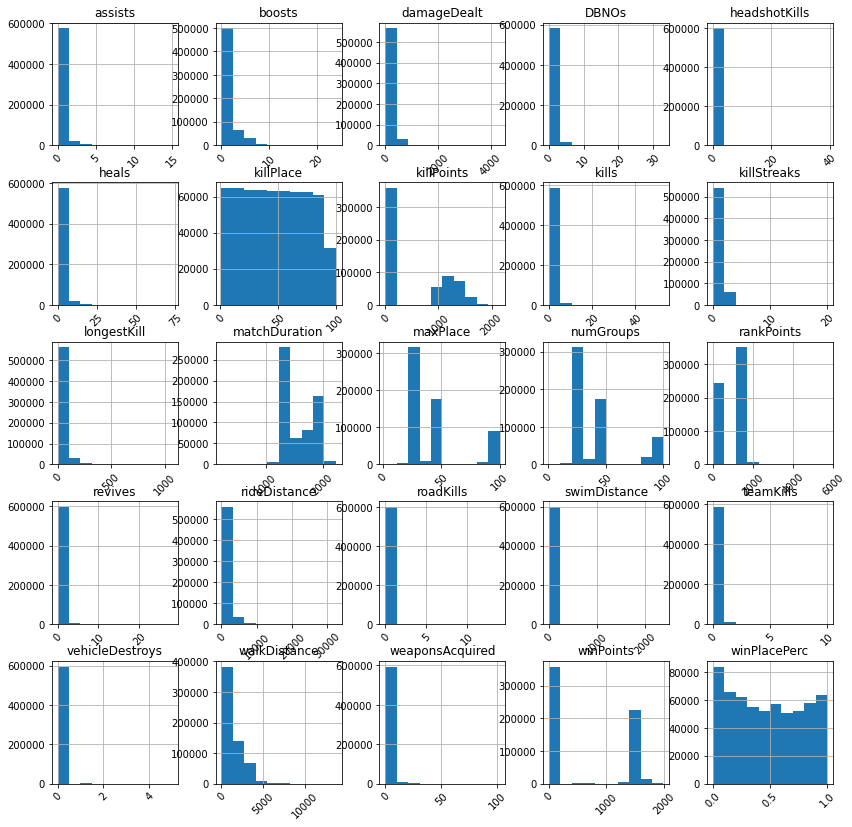

In [28]:
DatosPUBG.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma, se observa que existe una gran cantidad de variables sesgadas a la izquierda, o en ambos extremos. Por ejemplo, se tienen las variables **assists**, **boosts**, y **damageDealt**.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [29]:
DatosPUBG.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,...,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,0.234520,1.106728,131.007527,0.660270,0.228103,1.370818,47.592292,505.514667,0.928488,0.545482,...,0.165882,601.209889,0.003590,4.518447,0.024102,0.007853,1154.905092,3.660642,607.053655,0.472556
std,0.590684,1.714734,171.356522,1.146983,0.607500,2.681873,27.493228,627.599883,1.564540,0.713089,...,0.475130,1491.210887,0.075744,30.516878,0.169590,0.092619,1184.545283,2.465785,739.813875,0.307548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.700000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,84.360000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,685.800000,3.000000,0.000000,0.458300
75%,0.000000,2.000000,186.300000,1.000000,0.000000,2.000000,71.000000,1172.000000,1.000000,1.000000,...,0.000000,0.037600,0.000000,0.000000,0.000000,0.000000,1977.000000,5.000000,1495.000000,0.740700
max,15.000000,24.000000,4347.000000,33.000000,39.000000,73.000000,100.000000,2154.000000,53.000000,20.000000,...,28.000000,32450.000000,14.000000,2387.000000,10.000000,5.000000,13660.000000,102.000000,1999.000000,1.000000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores perdidos. Estos son: **Car**, **Landsize** y **YearBuilt**.

**3) Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

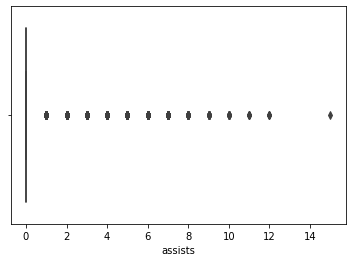

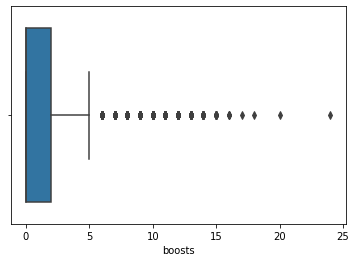

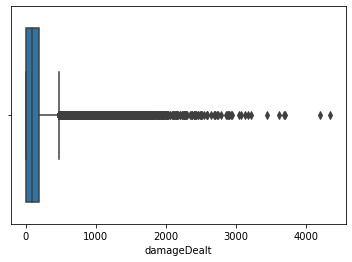

In [30]:
VariablesValoresAtipicos = ["assists", "boosts", "damageDealt"]
for col in VariablesValoresAtipicos:
  sns.boxplot(x=col, data=DatosPUBG)
  plt.show()

Se observa que las tres variables tienen valores atípicos que están lejos de los otros valores. Sin embargo, analizando el significado de cada una, no es tan inusual este comportamiento, ya que se trata de las estadísticas de jugadores que probablemente sean muy buenos, o con mal desempeño.

**4) Distribución de variables categóricas**

Se refiere a la observación de las clases de cada columna (variable) y su frecuencia. Aquí, los gráficos ayudan para tener una idea general de las distribuciones, mientras que las estadísticas dan números reales.

In [31]:
DatosPUBG.describe(include='object')

,Id,groupId,matchId,matchType
count,600000,600000,600000,600000
unique,561118,492456,47862,16
top,96952a3b912964,f602ed0e8b01ea,e374066efce9b7,squad-fpp
freq,5,9,32,236991


* Esta tabla es diferente al de los valores numéricos. Aquí, se obtiene el recuento de los valores de cada variable, el número de clases únicas, la clase más frecuente y con qué frecuencia ocurre esa clase en el conjunto de datos.
* Se observa que lsoa_code tiene demasiados valores únicos. 
* A partir de estos hallazgos, se puede a manera de ejemplo graficar las variables con 10 o menos clases únicas.

**Plot**

* Para este tipo de gráficos se utiliza Seaborn, que permite generar un histograma para variables categóricas. Cada barra en el gráfico de conteo representa una clase.
* Se crea un bucle para el conteo y distribución de las clases. La sentencia select_dtypes(include = ’object’) selecciona las columnas categóricas con sus valores y las muestra.
* Se incluye también If para elegir solo las tres columnas con 10 o menos clases usando series.**nunique() < 10**.


In [32]:
for col in DatosPUBG.select_dtypes(include='object'):
  if DatosPUBG[col].nunique()<10:sns.countplot(y=col, data=DatosPUBG)
  plt.show()

**5) Agrupación por variables categóricas**





In [33]:
for col in DatosPUBG.select_dtypes(include='object'):
  if DatosPUBG[col].nunique() < 10:
    display(DatosPUBG.groupby(col).agg(['mean']))

### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [34]:
DatosPUBG.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.306190,0.408154,0.301829,0.197735,0.229220,-0.290068,0.039375,0.321687,0.244214,...,0.197234,0.111066,0.014634,0.023199,0.006615,0.057942,0.289138,0.246821,0.024164,0.298760
boosts,0.306190,1.000000,0.520376,0.360138,0.331758,0.536082,-0.555098,0.009637,0.500320,0.404988,...,0.253583,0.328725,0.035547,0.106188,0.009265,0.087313,0.641957,0.405867,-0.006535,0.635414
damageDealt,0.408154,0.520376,1.000000,0.734329,0.613756,0.345938,-0.677450,0.051016,0.888792,0.704257,...,0.257780,0.143025,0.055745,0.033202,0.017120,0.083906,0.397307,0.354917,0.019005,0.440581
DBNOs,0.301829,0.360138,0.734329,1.000000,0.464939,0.269185,-0.556495,0.042445,0.706371,0.646261,...,0.304916,0.104406,0.034547,0.015234,0.068570,0.060729,0.285014,0.217118,0.010709,0.280947
headshotKills,0.197735,0.331758,0.613756,0.464939,1.000000,0.199288,-0.468002,0.021835,0.675488,0.515032,...,0.149812,0.077398,0.014114,0.025610,0.009227,0.040349,0.248771,0.217415,0.003042,0.276951
heals,0.229220,0.536082,0.345938,0.269185,0.199288,1.000000,-0.386957,-0.000730,0.313658,0.271492,...,0.238892,0.296281,0.024050,0.077098,0.033499,0.060842,0.431151,0.310436,-0.009686,0.428354
killPlace,-0.290068,-0.555098,-0.677450,-0.556495,-0.468002,-0.386957,1.000000,-0.024178,-0.730192,-0.810169,...,-0.270359,-0.236673,-0.056777,-0.088925,-0.037258,-0.072815,-0.590447,-0.490739,-0.003523,-0.719147
killPoints,0.039375,0.009637,0.051016,0.042445,0.021835,-0.000730,-0.024178,1.000000,0.036889,0.037071,...,0.012471,-0.026054,-0.002458,-0.006169,-0.040721,-0.006219,0.005640,-0.002219,0.983456,0.014463
kills,0.321687,0.500320,0.888792,0.706371,0.675488,0.313658,-0.730192,0.036889,1.000000,0.802815,...,0.252284,0.116707,0.066637,0.035303,0.017909,0.082225,0.374408,0.339116,0.007865,0.420471
killStreaks,0.244214,0.404988,0.704257,0.646261,0.515032,0.271492,-0.810169,0.037071,0.802815,1.000000,...,0.240404,0.100449,0.071343,0.034264,0.027671,0.066663,0.327941,0.277134,0.008798,0.378204


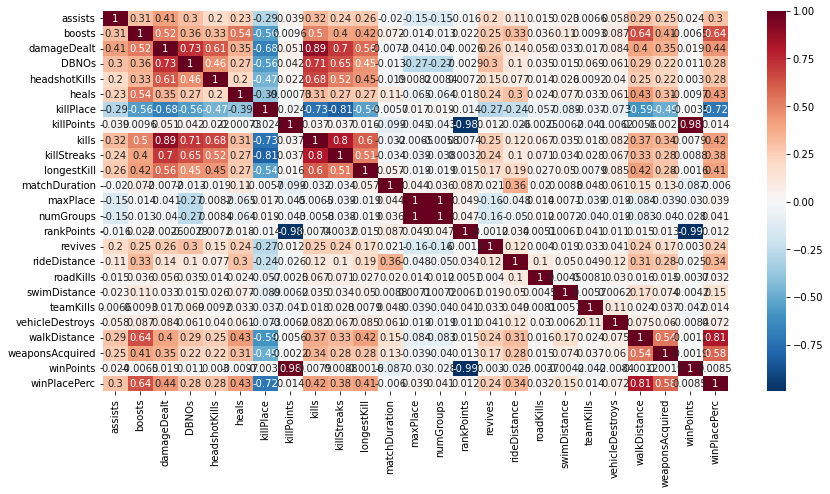

In [35]:
plt.figure(figsize=(14,7))
sns.heatmap(DatosPUBG.corr(), cmap='RdBu_r', annot=True)
plt.show()

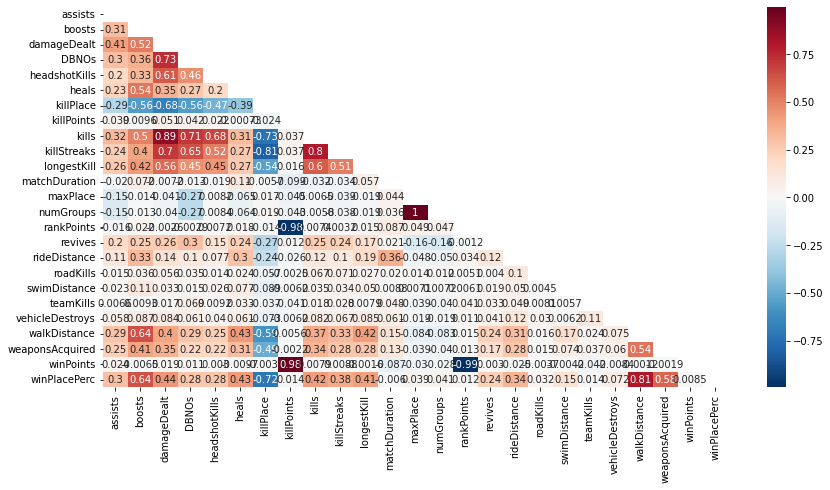

In [36]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(DatosPUBG.corr())
sns.heatmap(DatosPUBG.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.


### **Paso 5: Preparación de los datos**

Se utilizan diversos criterios para "limpiar los datos" y hacer que el dataset tenga datos congruentes y útiles para su análisis. En este caso, primero se eliminarían las tuplas con valores valores nulos. Sin embargo, observamos que el dataset no tiene ningún valor nulo.

In [37]:
DatosPUBG.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

Posteriormente, se eliminan aquellas tuplas que tienen valores atípicos en alguna columna. Recordando el paso 3.3, se observó en el histograma que existe una gran cantidad de variables sesgadas a la izquierda, o en ambos extremos. Por ejemplo, se tienen las variables **assists**, **boosts**, y **damageDealt**. Se observa que las tres variables tienen valores atípicos que están lejos de los otros valores. Sin embargo, analizando el significado de cada una, no es tan inusual este comportamiento, ya que se trata de las estadísticas de jugadores que probablemente sean muy buenos, o con mal desempeño, de lo cual se puede deducir información relevante.